# Comparative Analysis of LightGBM and XGBoost using Titanic Dataset

# Importing Libraries and Loading Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import lightgbm as lgb
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Loading Titanic Dataset

In [ ]:
import pandas as pd

# Step 1: Load the datasets
titanic_train = pd.read_csv('/content/Titanic_train.csv') #Training data
titanic_test = pd.read_csv('/content/Titanic_test.csv') #Test data

# Step 2: Calculate the mean of the 'survived' column in the training dataset
mean_survived = titanic_train['Survived'].mean()

# Step 3: Create the 'survived' column in the test dataset and fill it with the mean
titanic_test['survived'] = mean_survived

# Step 4: Merge the datasets
df = pd.concat([titanic_train, titanic_test], ignore_index=True)

# Display the merged dataset
print(df.head())

   PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  survived  
0      0         A/5 21171   7.2500   NaN        S       NaN  
1      0          PC 17599  71.2833   C85        C       NaN  
2      0  STON/O2. 3101282   7.9250   NaN        S       NaN  
3      0            113803  53.1000  C123        S       NaN  
4    

#Exploratory Data Analysis (EDA)

In [ ]:
# Checking for missing values
print(df.isnull().sum())

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
survived        891
dtype: int64


In [ ]:
#Separating numerical and categorical columsn from dataset
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype == 'O']

In [ ]:
# Handling missing values nd Apply Encoding techniques.
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Create a SimpleImputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Create a SimpleImputer for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')

# Apply the SimpleImputer to numerical columns
df[num_cols] = num_imputer.fit_transform(df[num_cols])

# Apply the SimpleImputer to categorical columns
if cat_cols:  # This ensures the code only runs if there are categorical columns
    df[cat_cols] = cat_imputer.fit_transform(df[cat_cols])
else:
    print("No categorical columns found after initial processing.")

#Apply the LabelEncoder to categorical columns
le = LabelEncoder()
df[cat_cols] = df[cat_cols].apply(le.fit_transform)

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,survived
0,1.0,0.000000,3.0,155,1,22.000000,1.0,0.0,720,7.2500,80,2,0.383838
1,2.0,1.000000,1.0,286,0,38.000000,1.0,0.0,816,71.2833,106,0,0.383838
2,3.0,1.000000,3.0,523,0,26.000000,0.0,0.0,914,7.9250,80,2,0.383838
3,4.0,1.000000,1.0,422,0,35.000000,1.0,0.0,65,53.1000,70,2,0.383838
4,5.0,0.000000,3.0,22,1,35.000000,0.0,0.0,649,8.0500,80,2,0.383838
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305.0,0.383838,3.0,1126,1,29.881138,0.0,0.0,711,8.0500,80,2,0.383838
1305,1306.0,0.383838,1.0,891,0,39.000000,0.0,0.0,834,108.9000,64,0,0.383838
1306,1307.0,0.383838,3.0,1046,1,38.500000,0.0,0.0,872,7.2500,80,2,0.383838
1307,1308.0,0.383838,3.0,1227,1,29.881138,0.0,0.0,579,8.0500,80,2,0.383838


# Exploring Data Distributions

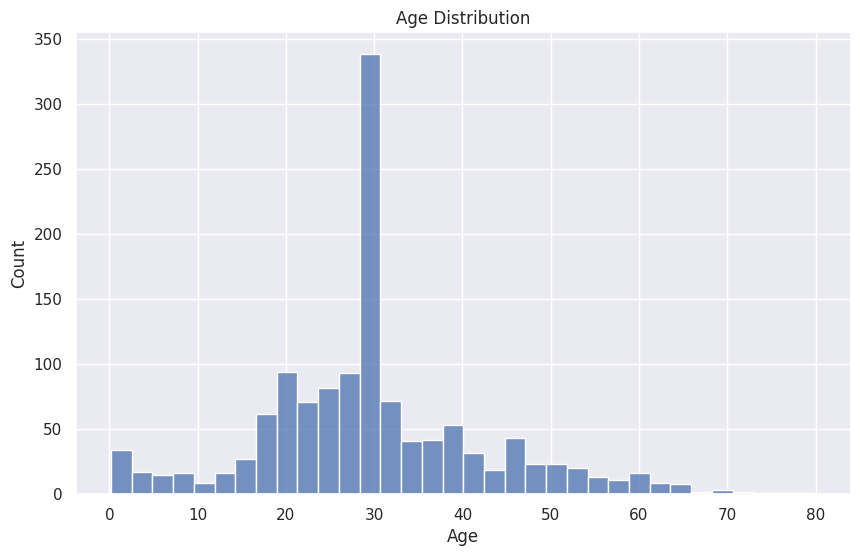


Box plot


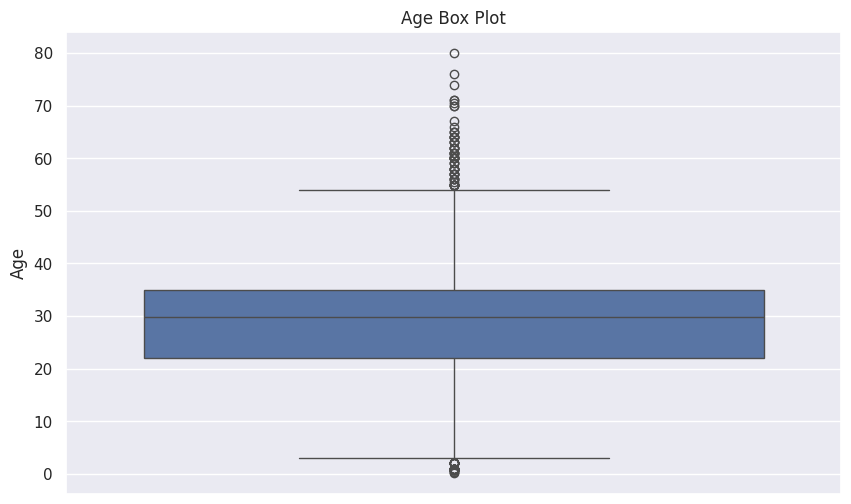

In [ ]:
# Explore data distributions using histograms and box plots
sns.set()
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'].dropna())
plt.title('Age Distribution')
plt.show()

print("\nBox plot")
plt.figure(figsize=(10, 6))
sns.boxplot(df['Age'].dropna())
plt.title('Age Box Plot')
plt.show()

# Visualizing Relationships between Features and Survival

AGE vs SURVIVAL


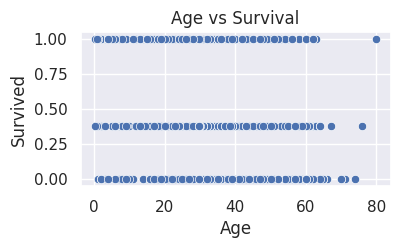


 SEX vs SURVIVAL


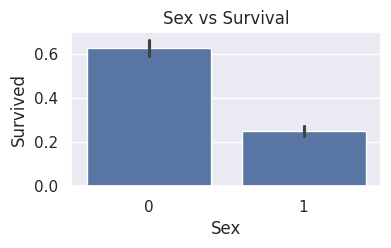

In [ ]:
# Visualize relationships between features and survival using scatter plots and bar plots
print("AGE vs SURVIVAL")
plt.figure(figsize=(4,2))
sns.scatterplot(x='Age', y='Survived', data=df)
plt.title('Age vs Survival')
plt.show()

print("\n SEX vs SURVIVAL")
plt.figure(figsize=(4, 2))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Sex vs Survival')
plt.show()

# Building Predictive Models

In [ ]:
# Split the preprocessed dataset into training and testing sets
X = df.drop(['Survived'], axis=1)
y = df['Survived']
# Convert y to integer type to represent discrete classes
y = y.astype(int)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Choosing Evaluation Metrics

In [ ]:
# Choose appropriate evaluation metrics
evaluation_metrics = [accuracy_score, precision_score, recall_score, f1_score]

# Building LightGBM Model

In [ ]:
# Build LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 269, number of negative: 778
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000208 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1141
[LightGBM] [Info] Number of data points in the train set: 1047, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.256925 -> initscore=-1.062015
[LightGBM] [Info] Start training from score -1.062015
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier()

# Building XGBoost Model

In [ ]:
# Build XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

# Comparative Analysis

In [ ]:
# Evaluate model performance on the testing set
lgb_pred = lgb_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

lgb_results = [metric(y_test, lgb_pred) for metric in evaluation_metrics]
xgb_results = [metric(y_test, xgb_pred) for metric in evaluation_metrics]

print('LightGBM Results:')
for i, metric in enumerate(evaluation_metrics):
    print(f'{metric.__name__}: {lgb_results[i]}')
print("\nXGBoost Results:")
for i, metric in enumerate(evaluation_metrics):
    print(f'{metric.__name__}: {xgb_results[i]}')

LightGBM Results:
accuracy_score: 0.8625954198473282
precision_score: 0.7846153846153846
recall_score: 0.6986301369863014
f1_score: 0.7391304347826086

XGBoost Results:
accuracy_score: 0.8664122137404581
precision_score: 0.7638888888888888
recall_score: 0.7534246575342466
f1_score: 0.7586206896551724


# Calculate ROC curve and AUC & Plot the ROC curves

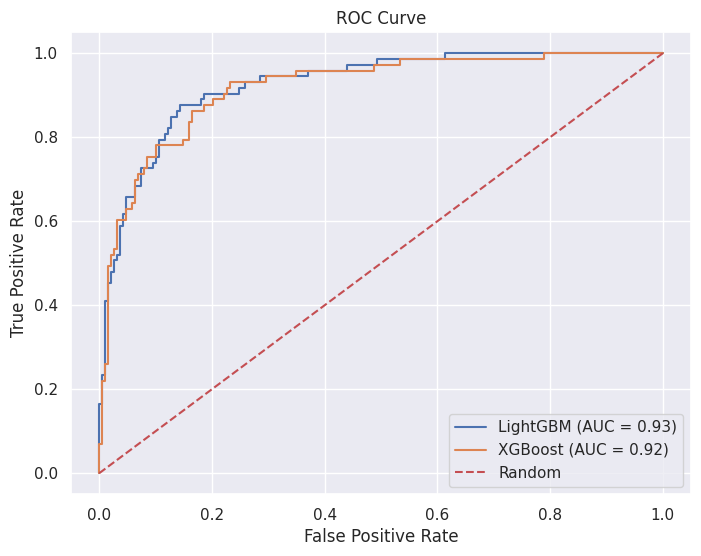

In [ ]:
#Importing neccesary packages
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculating ROC curve and AU

# LightGBM
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]
lgb_fpr, lgb_tpr, _ = roc_curve(y_test, lgb_probs)
lgb_auc = auc(lgb_fpr, lgb_tpr)

# XGBoost
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
xgb_fpr, xgb_tpr, _ = roc_curve(y_test, xgb_probs)
xgb_auc = auc(xgb_fpr, xgb_tpr)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(lgb_fpr, lgb_tpr, label=f'LightGBM (AUC = {lgb_auc:.2f})')
plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()
